<a href="https://colab.research.google.com/github/nandish352/MLe3/blob/main/MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Accuracy: 0.9996617050067659
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1402
           1       1.00      1.00      1.00      1554

    accuracy                           1.00      2956
   macro avg       1.00      1.00      1.00      2956
weighted avg       1.00      1.00      1.00      2956



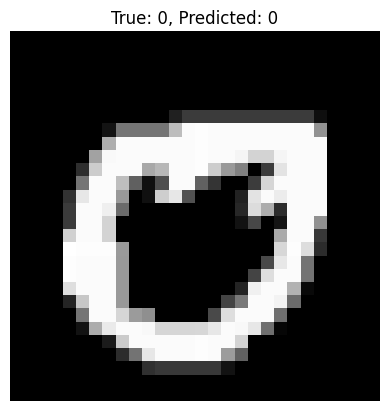

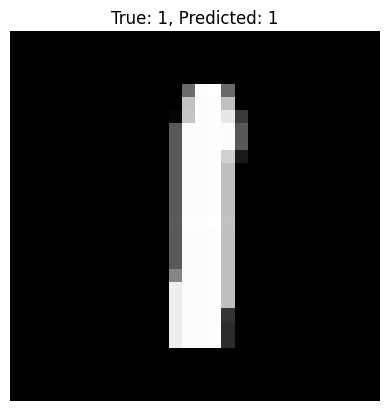

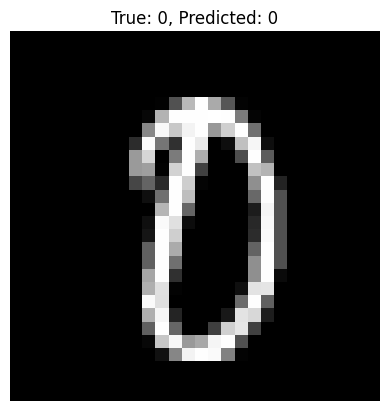

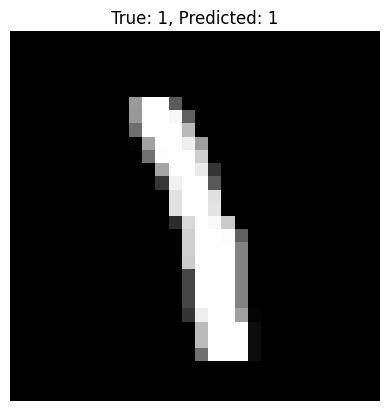

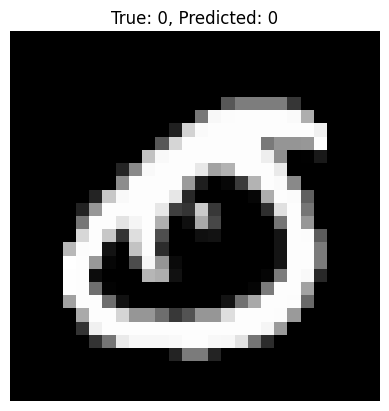

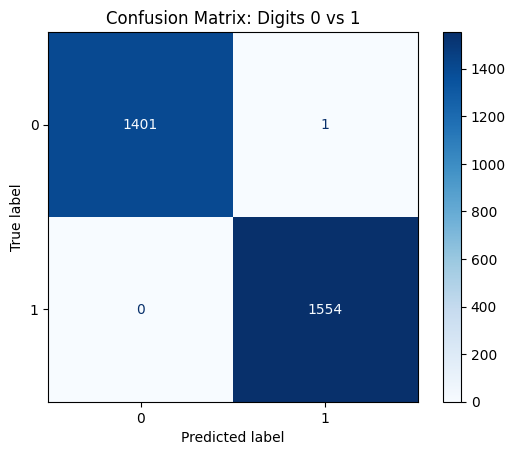

In [2]:
from sklearn.datasets import fetch_openml
import numpy as np
import pandas as pd

# Load MNIST dataset
mnist = fetch_openml('mnist_784', version=1, as_frame=True)
X = mnist.data
y = mnist.target.astype(int)  # Convert labels to integers

mask = (y == 0) | (y == 1)
X_binary = X[mask]
y_binary = y[mask]

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_binary, y_binary, test_size=0.2, random_state=42)

# Train model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Evaluate
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

import matplotlib.pyplot as plt

for i in range(5):
    image = X_test.iloc[i].values.reshape(28, 28)  # Convert to NumPy array and reshape
    plt.imshow(image, cmap='gray')
    plt.title(f"True: {y_test.iloc[i]}, Predicted: {y_pred[i]}")
    plt.axis('off')
    plt.show()



from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display it
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
disp.plot(cmap='Blues')
plt.title("Confusion Matrix: Digits 0 vs 1")
plt.show()